# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

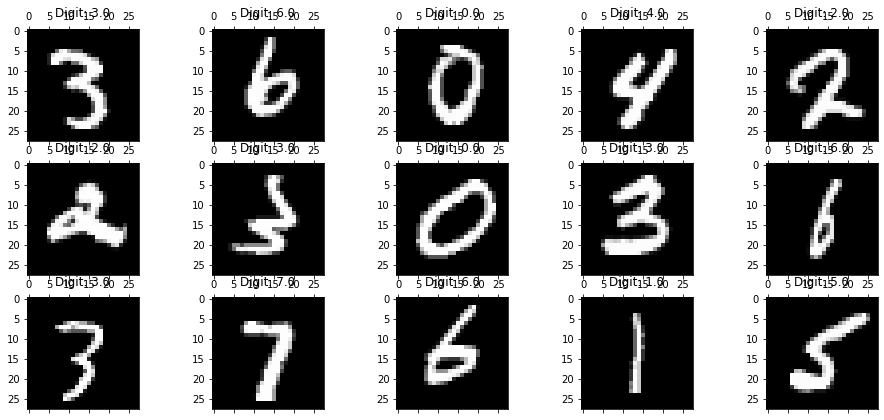

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test) 

PCA를 하기에 앞서서 scaling을 진행한다. 주성분 개수를 결정하기 위해 다음 세가지 방법을 사용한다.

    1) Elbow Point: Scree Plot에서 곡선의 기울기가 급격하게 감소하는 지점
    2) Kaiser's Rule: 고윳값이 1 이상인 주성분들
    3) 누적 설명률이 70~80%이상인 지점

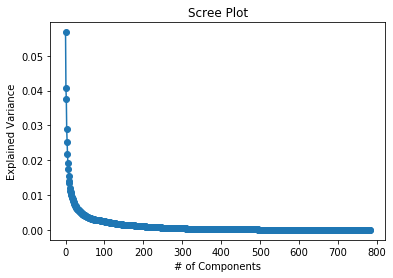

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train_std.shape[1]-1).fit(X_train_std)

plt.title("Scree Plot")
plt.xlabel("# of Components")
plt.ylabel("Explained Variance")
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

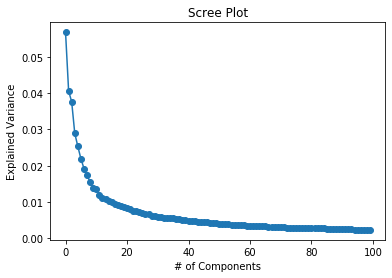

In [11]:
pca = PCA(n_components=100).fit(X_train_std)

plt.title("Scree Plot")
plt.xlabel("# of Components")
plt.ylabel("Explained Variance")
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

먼저, elbow point는 약 10~15정도로 추정된다. 두번째로, Kaiser's Rule을 적용하여 고윳값이 1 이상인 주성분들의 개수를 구해보자.

In [12]:
pca = PCA(n_components=X_train_std.shape[1]-1).fit(X_train_std)
eigen_values = pca.explained_variance_
print(len(eigen_values[eigen_values>=1]))

163


eigen value가 1보다 큰 경우는 총 163개이다. 즉, n_components가 163보다 작으면 Kaiser's Rule을 만족한다고 할 수 있다.

마지막으로, 누적설명률이 80% 이상인 지점을 찾아보았다.

In [13]:
pca = PCA(n_components=0.8).fit(X_train_std)
print("# of Components: ", pca.n_components_)
print("Acumulated Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))
# print("Eigen value: ", pca.explained_variance_)
# print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

# of Components:  147
Acumulated Explained Variance Ratio:  0.8003463236270364


주성분이 145개 이상일 때, 누적 설명률이 80%를 넘는 것을 확인할 수 있었다. 따라서 n_components를 150으로 두고 PCA를 진행하기로 결정하였다.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis().fit(X_train_std, y_train)

print("Acumulated Explained Variance Ratio: ", sum(lda.explained_variance_ratio_))

print("\nTrain Acc: ", accuracy_score(y_train, lda.predict(X_train_std)))
print("Test Acc: ", accuracy_score(y_test, lda.predict(X_test_std)))

Acumulated Explained Variance Ratio:  1.0000000000000002

Train Acc:  0.8728392857142857
Test Acc:  0.871


LDA의 누적 설명률은 100%로 정보의 손실은 없는 것으로 나타난다. Train set의 accuracy는 87.25% 정도이고, Test set의 accuracy는 86.66%이다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [15]:
import time
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [16]:
def acc(model, X, y):
    pred = model.predict(X)
    return accuracy_score(y, pred)

In [17]:
rf = RandomForestClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
lgbm = LGBMClassifier()

pca = PCA(n_components=150).fit(X_train_std)
lda = LinearDiscriminantAnalysis().fit(X_train_std, y_train)


models = {"Ramdom Forest": rf, "Logistic Regression": lr, 'Decision Tree': dt, 'SVM': svm, 'LGBM': lgbm}
datasets = {'Original':(X_train, y_train, X_test, y_test),
           'Scaled': (X_train_std, y_train, X_test_std, y_test), 
           'PCA': (pca.transform(X_train_std), y_train, pca.transform(X_test_std), y_test),
           'LDA': (lda.transform(X_train_std), y_train, lda.transform(X_test_std), y_test)}

4개의 데이터셋과 5개의 모델에 대해 각각 학습시킨 후 test acc와 training time을 함께 dataframe에 저장하였다.

In [18]:
result = pd.DataFrame(columns=['Model', 'Dataset', 'Train acc', 'Test acc', 'Time'])
trained_model = {}
for m in models:
    for dat in datasets:
        X_train, y_train, X_test, y_test = datasets[dat]
        start = time.time()
        model = models[m].fit(X_train, y_train)
        duration = time.time() - start
        train_acc = acc(model, X_train, y_train)
        test_acc = acc(model, X_test, y_test)
        trained_model[m+"_"+dat] = model
        tmp = {'Model': m, "Dataset": dat, "Train acc": train_acc, "Test acc": test_acc, "Time": duration}
        print(tmp)
        result = result.append(tmp, ignore_index = True)

{'Model': 'Ramdom Forest', 'Dataset': 'Original', 'Train acc': 1.0, 'Test acc': 0.9697142857142858, 'Time': 36.39315891265869}
{'Model': 'Ramdom Forest', 'Dataset': 'Scaled', 'Train acc': 1.0, 'Test acc': 0.969, 'Time': 34.74645709991455}
{'Model': 'Ramdom Forest', 'Dataset': 'PCA', 'Train acc': 1.0, 'Test acc': 0.9454285714285714, 'Time': 74.82266807556152}
{'Model': 'Ramdom Forest', 'Dataset': 'LDA', 'Train acc': 0.9999821428571428, 'Test acc': 0.9158571428571428, 'Time': 19.411760807037354}
{'Model': 'Logistic Regression', 'Dataset': 'Original', 'Train acc': 0.9343035714285715, 'Test acc': 0.9207142857142857, 'Time': 13.02805209159851}
{'Model': 'Logistic Regression', 'Dataset': 'Scaled', 'Train acc': 0.9435357142857143, 'Test acc': 0.9166428571428571, 'Time': 11.837696075439453}
{'Model': 'Logistic Regression', 'Dataset': 'PCA', 'Train acc': 0.9275357142857142, 'Test acc': 0.9214285714285714, 'Time': 3.6098878383636475}
{'Model': 'Logistic Regression', 'Dataset': 'LDA', 'Train acc'

In [19]:
def top(df, column='val'):
    return df.sort_values(by=column, ascending=False).loc[:, ['Model', 'Train acc', 'Test acc', 'Time']].reset_index(drop=True)

result.groupby("Dataset").apply(top, column="Test acc")

Model  Train acc  Test acc        Time
Dataset                                                         
LDA      0                  SVM   0.926143  0.917357   10.148603
         1        Ramdom Forest   0.999982  0.915857   19.411761
         2                 LGBM   0.952750  0.913357    2.143306
         3  Logistic Regression   0.891536  0.886929    1.397369
         4        Decision Tree   1.000000  0.858286    1.062916
Original 0                  SVM   0.989375  0.979429  426.887675
         1                 LGBM   0.998679  0.972357   47.306600
         2        Ramdom Forest   1.000000  0.969714   36.393159
         3  Logistic Regression   0.934304  0.920714   13.028052
         4        Decision Tree   1.000000  0.873071   18.148841
PCA      0                  SVM   0.984357  0.969714  107.388799
         1                 LGBM   0.991964  0.951071   18.062789
         2        Ramdom Forest   1.000000  0.945429   74.822668
         3  Logistic Regression   0.927536  0.921429    3.609888
         4        Decision Tree   1.000000  0.831000   19.157651
Scaled   0                 LGBM   0.998607  0.972929   62.569859
         1        Ramdom Forest   1.000000  0.969000   34.746457
         2                  SVM   0.985857  0.965214  869.577796
         3  Logistic Regression   0.943536  0.916643   11.837696
         4        Decision Tree   1.000000  0.871143   18.168616

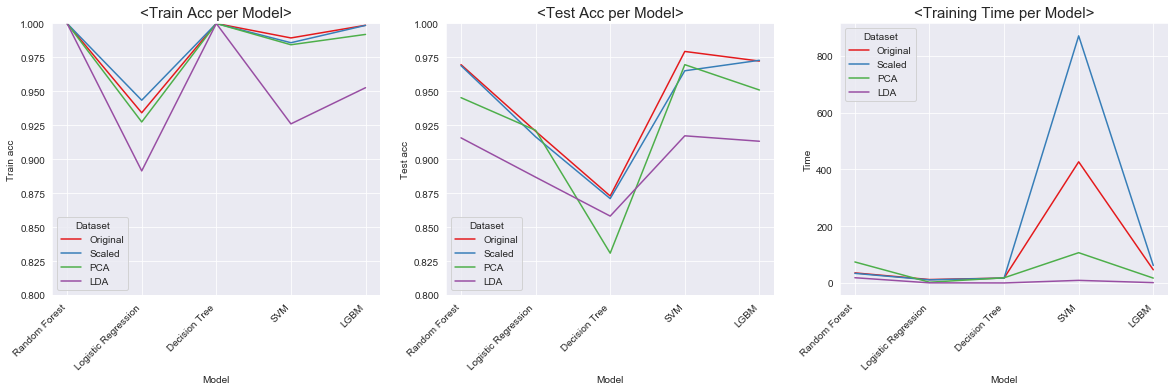

In [20]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("Set1")

fit, axes = plt.subplots(ncols=3, figsize = (20, 5))
xlabels = ["Random Forest", "Logistic Regression", "Decision Tree", "SVM", "LGBM"]
sns.lineplot(x='Model', y='Train acc', data = result, hue = 'Dataset', ax = axes[0])
sns.lineplot(x='Model', y='Test acc', data = result, hue = 'Dataset', ax = axes[1])
sns.lineplot(x='Model', y='Time', data = result, hue = 'Dataset', ax = axes[2])
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
axes[2].set_xticklabels(xlabels, rotation=45, ha='right')
axes[0].set_ylim([0.8, 1])
axes[1].set_ylim([0.8, 1])
axes[0].set_title('<Train Acc per Model>', size = 15)
axes[1].set_title('<Test Acc per Model>', size = 15)
axes[2].set_title('<Training Time per Model>', size = 15)
plt.show()

* Test acc가 가장 높은 경우는 **0.979**로, original data에 대해 SVM으로 학습시킨 경우였다.
* 대부분의 데이터셋에 대해 **SVM**이 가장 높은 성능을 보였다.
* Decision Tree와 Random Forest는 overfitting이 된 것으로 추정된다. Training acc는 100%로 나오지만 test acc는 가장 낮았다.
* LDA로 차원을 축소시킨 데이터셋이 가장 낮은 성능을 보였고, Original Dataset인 경우에 전반적으로 가장 높은 성능을 보였다.
* 나머지 머신러닝 모델들의 학습시간이 짧아 차이가 크게 체감되지는 않았지만 SVM의 경우 Original Dataset과 Scaling한 Dataset에 비해 차원축소를 한 경우 학습시간이 대폭 감소하는 것을 확인할 수 있었다. 특히 LDA로 차원 축소를 한 경우 학습시간이 가장 짧은 것을 확인할 수 있었다.

특정한 틀 없이 자유롭게 해주시면 됩니다!

## 가장 높은 test accuracy가 나오신 분께 이모티콘을 증정해드리겠습니다!!